In [1]:
%matplotlib inline

import nltk
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud,STOPWORDS

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('data/Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
AirlineStopwords = ['United', 'Virgin America', 'Delta', 'US Airways', 'Southwest', 'American', 'amp', 'plane', 'flight', 'JetBlue']
stopwords.extend(AirlineStopwords)

Text(0, 0.5, 'No. of Tweets')

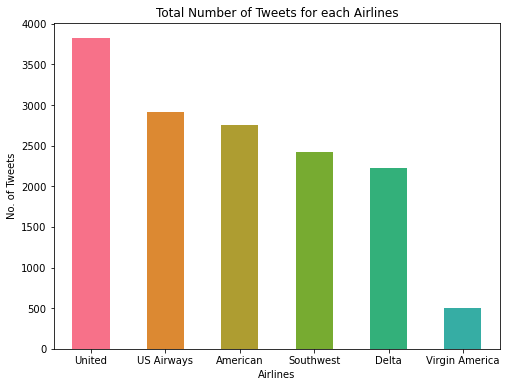

In [8]:
# Shows total number of tweets towards each airline
colors=sns.color_palette("husl", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total Number of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [9]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:title={'center':'Total Tweets for Each Sentiment'}, ylabel='airline_sentiment'>

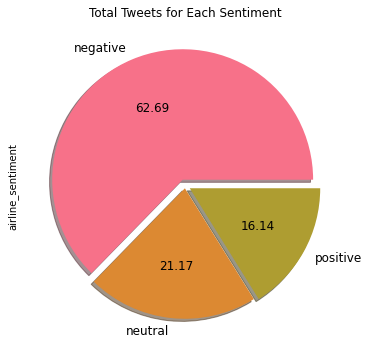

In [10]:
colors=sns.color_palette("husl", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

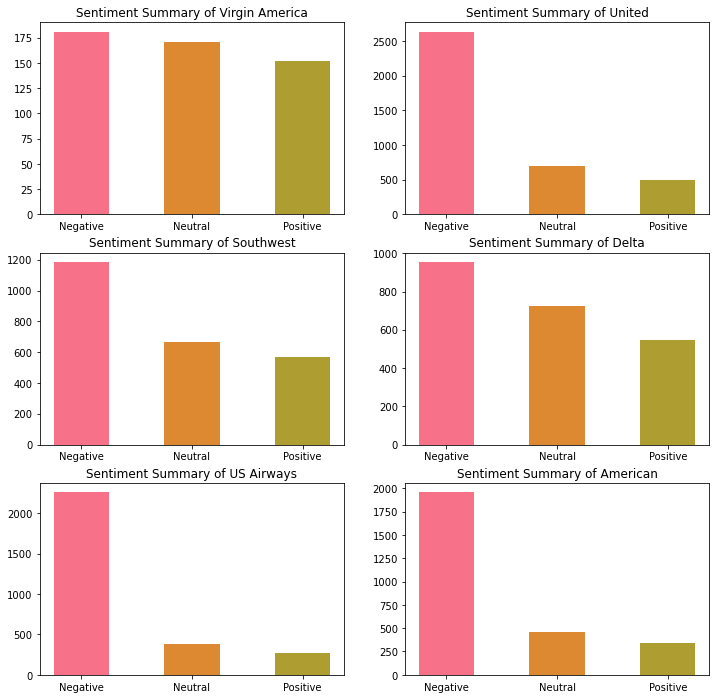

In [11]:
def plot_sub_sentiment(Airline):
    pdf = df[df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = df['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [12]:
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

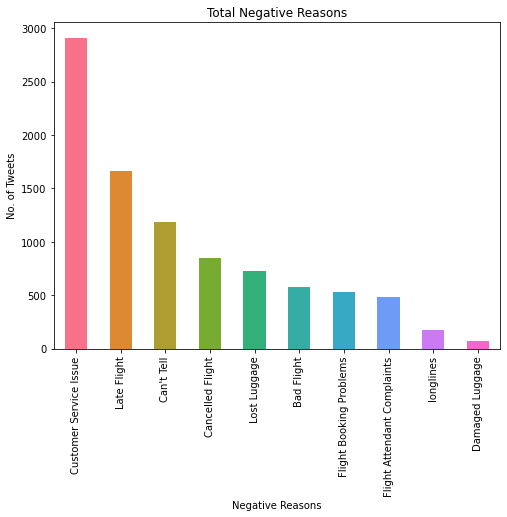

In [13]:
color=sns.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [14]:
df.negativereason.value_counts().head(5)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

<AxesSubplot:title={'center':'Top 5 Negative Reasons'}, ylabel='negativereason'>

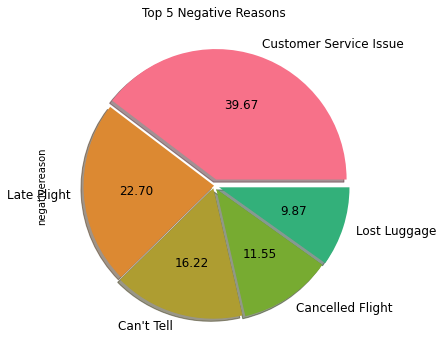

In [15]:
color=sns.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

In [16]:
air_sentiment = pd.crosstab(df.airline, df.airline_sentiment)
air_sentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [17]:
percent = air_sentiment.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


<AxesSubplot:title={'center':'Airline Sentiment'}, xlabel='airline'>

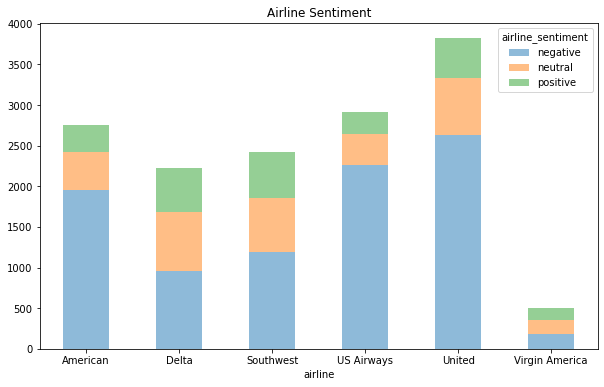

In [18]:
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

<AxesSubplot:title={'center':'Airline Sentiment Percentage'}, xlabel='airline'>

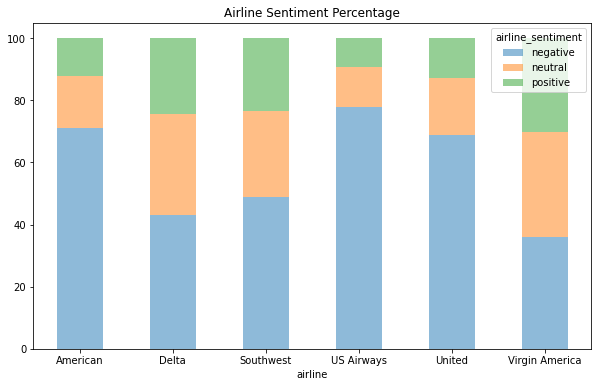

In [19]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

In [20]:
#visualization using wordcloud for the negative tweets
cloud = df[df['airline_sentiment']=='negative']
words = ' '.join(cloud['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                                and not word.startswith('@') and word != 'RT'])

In [21]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=3000, height=2500
                     ).generate(cleaned_word)

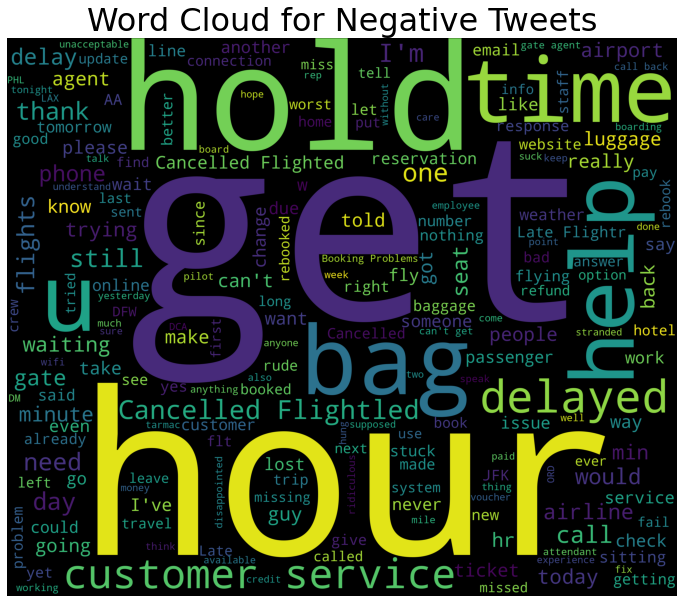

In [22]:
plt.figure(1,figsize=(12, 12))
plt.title('Word Cloud for Negative Tweets', fontdict={'fontsize': 32})
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
#visualization using wordcloud for the positive tweets
cloud = df[df['airline_sentiment']=='positive']
words = ' '.join(cloud['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                                and not word.startswith('@') and word != 'RT'])

In [24]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=3000, height=2500
                     ).generate(cleaned_word)

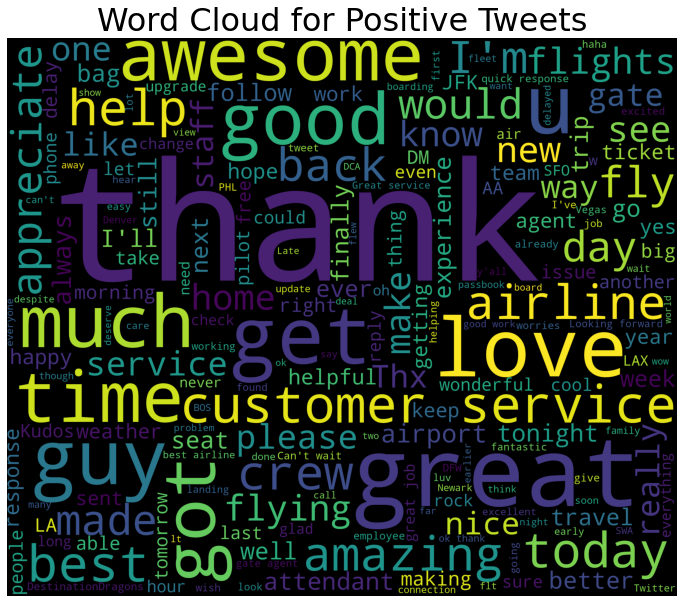

In [25]:
plt.figure(1,figsize=(12, 12))
plt.title('Word Cloud for Positive Tweets', fontdict={'fontsize': 32})
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [26]:
def reason_each_flight(airline):
    data = df[df['airline'] == airline]
    data = data['negativereason']
    data_count = data.value_counts()
    List = data.value_counts().index.tolist()
    Index = range(1,(len(data.unique())))
    plt.bar(Index, data_count)
    plt.xlabel('Negative Words')
    plt.ylabel('Total Number of Tweets')
    plt.title('Total number of Negative Tweets for ' + airline)
    plt.xticks(Index, List,rotation = 90)

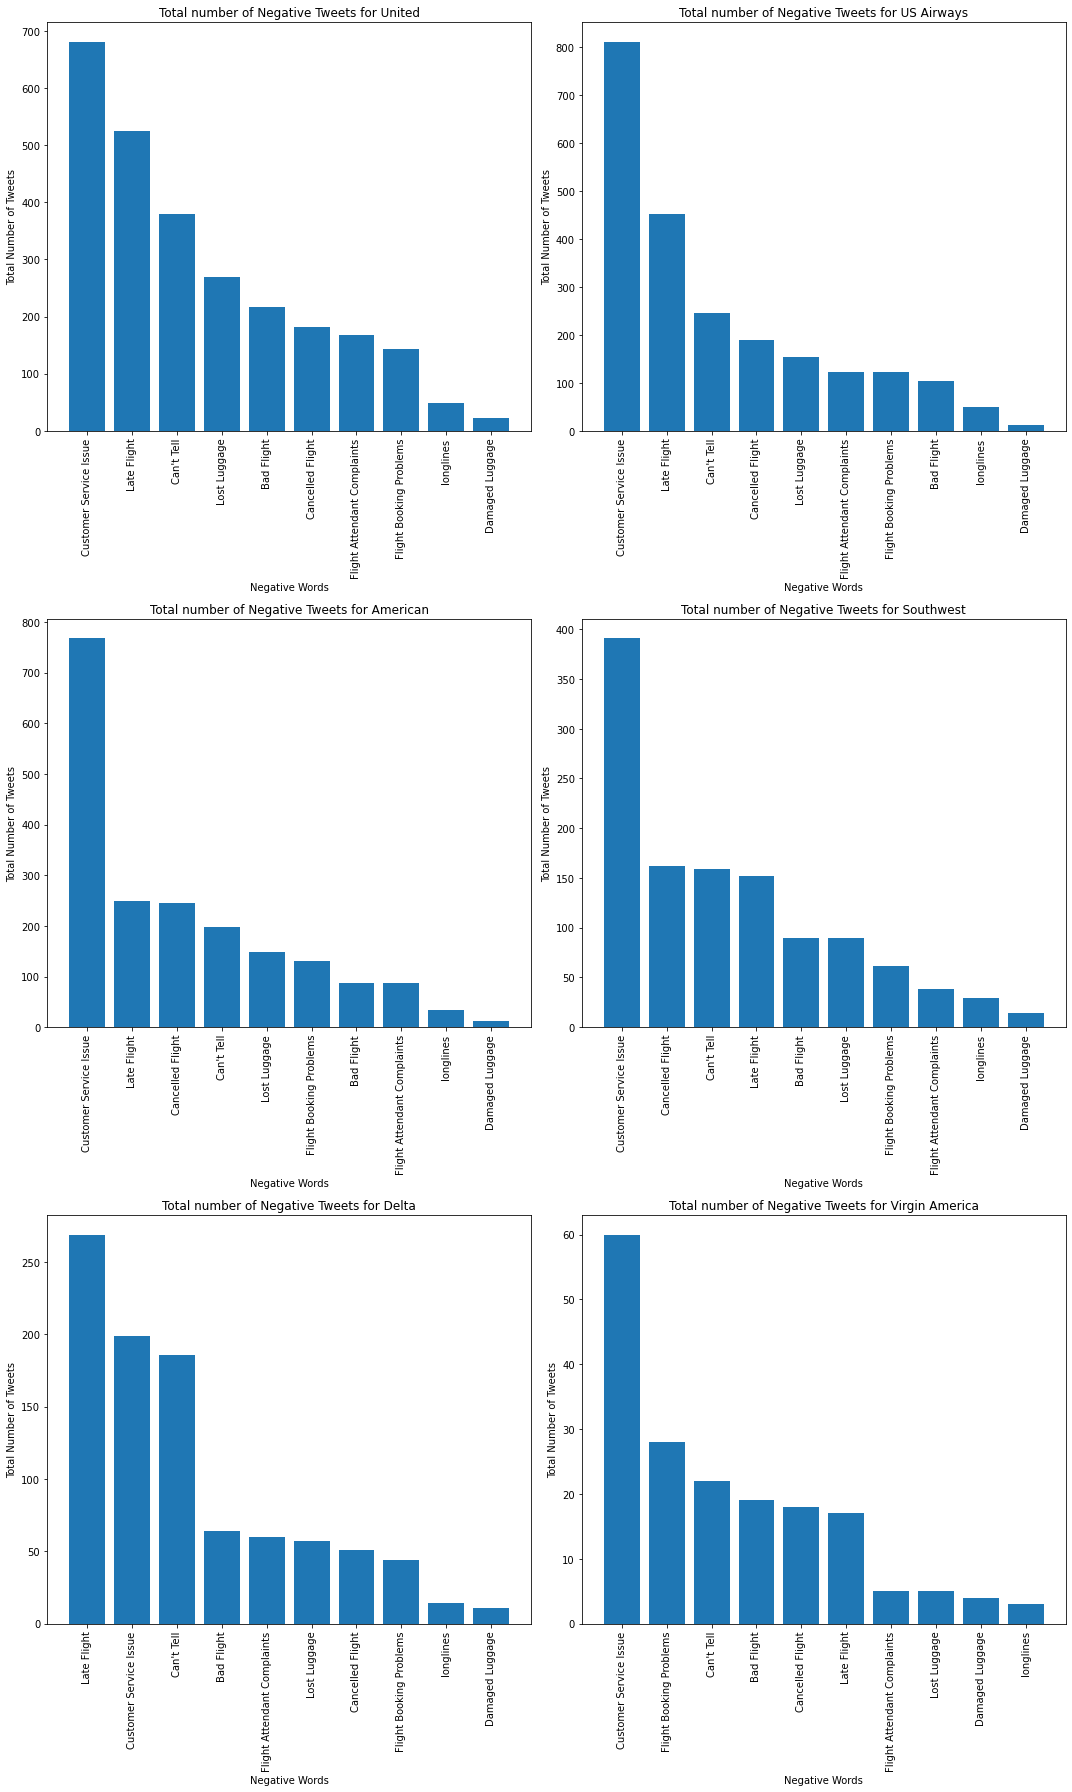

In [27]:
Air = df['airline'].value_counts().index.tolist()
plt.figure(1,figsize=(15, 25))
plt.subplot(321)
reason_each_flight(Air[0])
plt.subplot(322)
reason_each_flight(Air[1])
plt.subplot(323)
reason_each_flight(Air[2])
plt.subplot(324)
reason_each_flight(Air[3])
plt.subplot(325)
reason_each_flight(Air[4])
plt.subplot(326)
reason_each_flight(Air[5])
plt.tight_layout()

In [28]:
df_delta = df[df['airline'] == 'Delta']

In [29]:
df_delta.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
6746,570309345281486848,positive,0.6469,NaN,NaN,Delta,NaN,jaxbra,NaN,0,@JetBlue Yesterday on my way from EWR to FLL j...,NaN,2015-02-24 11:48:38 -0800,"east brunswick, nj",Atlantic Time (Canada)
6747,570309308937842688,neutral,0.6869,NaN,NaN,Delta,NaN,Oneladyyouadore,NaN,0,@JetBlue I hope so because I fly very often an...,NaN,2015-02-24 11:48:29 -0800,Georgia,Quito
6748,570308513181904901,neutral,1.0000,NaN,NaN,Delta,NaN,Oneladyyouadore,NaN,0,"@JetBlue flight 1041 to Savannah, GA",NaN,2015-02-24 11:45:20 -0800,Georgia,Quito
6749,570307820962373632,negative,1.0000,Flight Attendant Complaints,0.6522,Delta,NaN,Oneladyyouadore,NaN,0,"@JetBlue They weren't on any flight, they just...",NaN,2015-02-24 11:42:34 -0800,Georgia,Quito
6750,570305363859406848,negative,1.0000,Bad Flight,1.0000,Delta,NaN,Oneladyyouadore,NaN,0,@JetBlue everyone is here but our pilots are n...,NaN,2015-02-24 11:32:49 -0800,Georgia,Quito


In [30]:
#visualization using wordcloud for the positive tweets
cloud = df_delta[df_delta['airline_sentiment']=='positive']
words = ' '.join(cloud['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                                and not word.startswith('@') and word != 'RT'])

In [31]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=3000, height=2500
                     ).generate(cleaned_word)

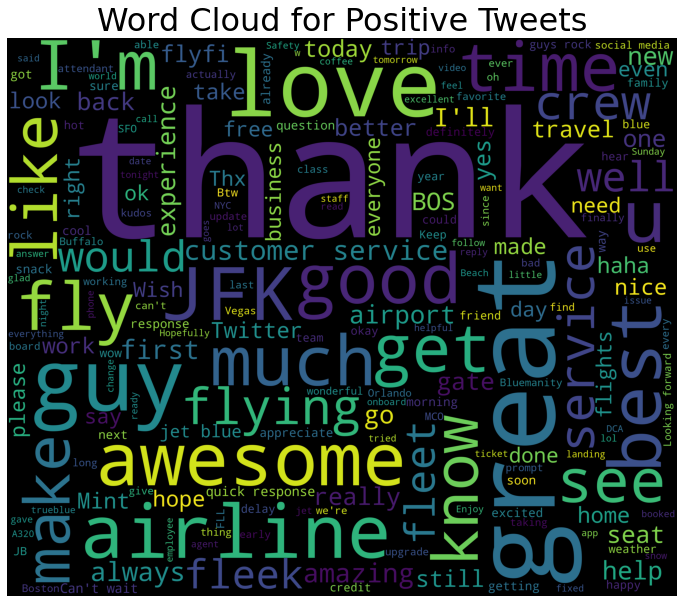

In [32]:
plt.figure(1,figsize=(12, 12))
plt.title('Word Cloud for Delta Positive Tweets', fontdict={'fontsize': 32})
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
df_southwest = df[df['airline'] == 'Southwest']

In [34]:
cloud = df_southwest[df_southwest['airline_sentiment']=='positive']
words = ' '.join(cloud['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                                and not word.startswith('@') and word != 'RT'])

In [35]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=3000, height=2500
                     ).generate(cleaned_word)

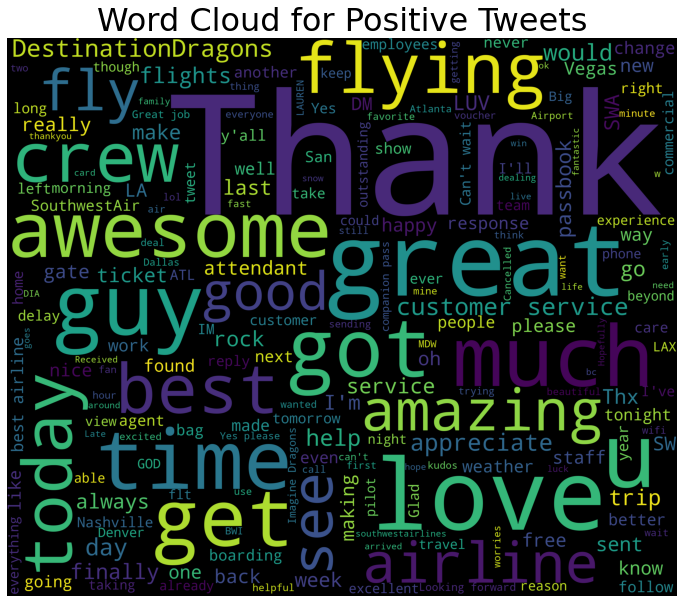

In [36]:
plt.figure(1,figsize=(12, 12))
plt.title('Word Cloud for Southwest Positive Tweets', fontdict={'fontsize': 32})
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
df_virginamerica = df[df['airline'] == 'Virgin America']

In [38]:
cloud = df_virginamerica[df_virginamerica['airline_sentiment']=='positive']
words = ' '.join(cloud['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                                and not word.startswith('@') and word != 'RT'])

In [39]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=3000, height=2500
                     ).generate(cleaned_word)

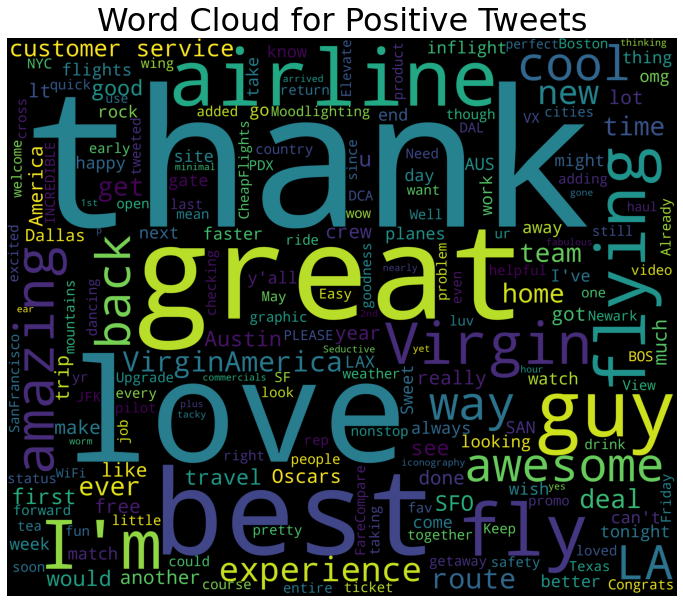

In [40]:
plt.figure(1,figsize=(12, 12))
plt.title('Word Cloud for Virgin American Positive Tweets', fontdict={'fontsize': 32})
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
df_united = df[df['airline'] == 'United']

In [42]:
cloud = df_united[df_united['airline_sentiment']=='negative']
words = ' '.join(cloud['text'])
cleaned_word = " ".join([word for word in words.split() if 'http' not in word
                                and not word.startswith('@') and word != 'RT'])

In [43]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=3000, height=2500
                     ).generate(cleaned_word)

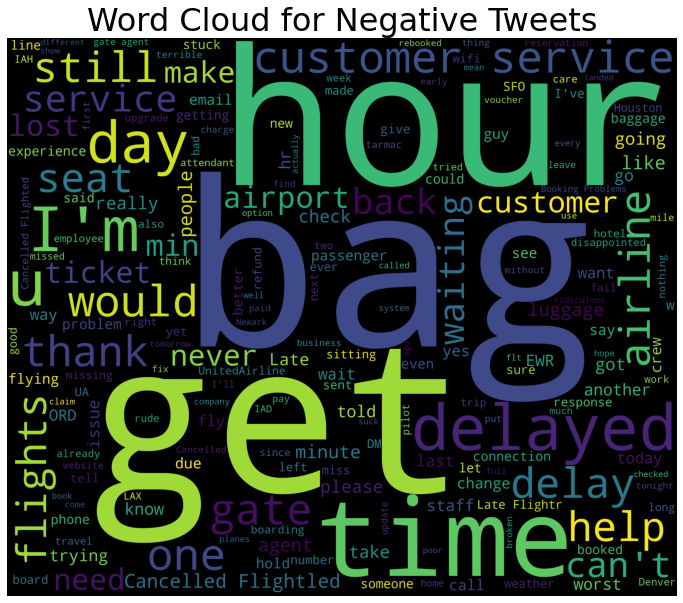

In [44]:
plt.figure(1,figsize=(12, 12))
plt.title('Word Cloud for United Negative Tweets', fontdict={'fontsize': 32})
plt.imshow(wordcloud)
plt.axis('off')
plt.show()